In [6]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

boston = load_boston()
X = boston.data
Y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=51)

print(X.shape, Y.shape)

(506, 13) (506,)


In [7]:
def gbm_predict(X):
	return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)])
                for x in X]

In [18]:
base_algorithms_list = []
coefficients_list = []
 
def get_grad():
 	return [y - a for a, y in zip(gbm_predict(X_train), y_train) ]

In [19]:
for i in np.arange(0, 50): 
    rg = DecisionTreeRegressor(random_state=42, max_depth=5)
    rg.fit(X_train, get_grad())  
    base_algorithms_list.append(rg)
    coefficients_list.append(0.9 / (1.0 + i))
    
pred = gbm_predict(X_test)
np.sqrt(mean_squared_error(y_test, pred)) 

5.3607371501561625

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
from sklearn.model_selection import cross_val_score

c:\users\dmitry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\dmitry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\dmitry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\dmitry\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default

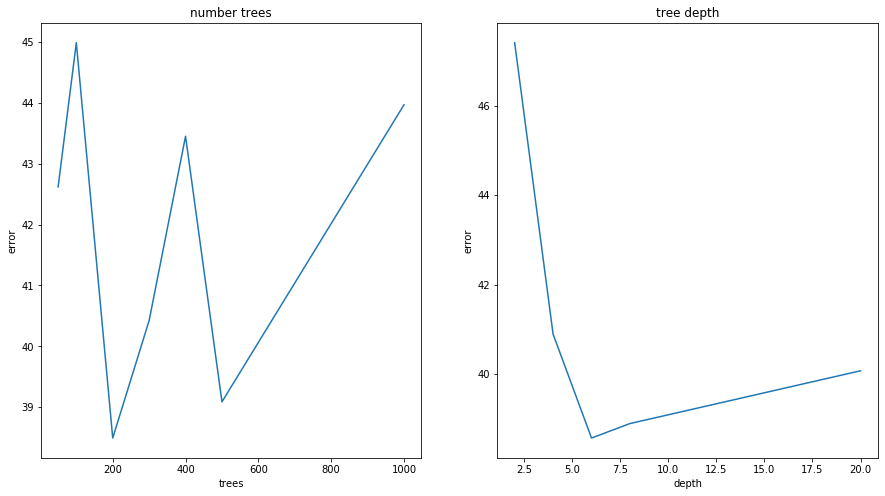

In [28]:
def test_xbg():
    plt.figure(figsize=(15,8))
    
    trees = [50, 100, 200, 300, 400, 500, 1000]
    errors = []
    for tree in trees:
        errors.append(
                -cross_val_score(DecisionTreeRegressor(), X, Y,  scoring='neg_mean_squared_error').mean()
        )
    plt.subplot(121)
    plt.plot(trees, errors)
    plt.xlabel("trees")
    plt.ylabel("error")
    plt.title("number trees")
    
    depth = [2, 4, 6, 8, 20]
    errors = []
    for d in depth:
        errors.append(
                -cross_val_score(DecisionTreeRegressor(max_depth=d), X, Y,  scoring='neg_mean_squared_error').mean()
        )
    plt.subplot(122)
    plt.plot(depth, errors)
    plt.xlabel("depth")
    plt.ylabel("error")
    plt.title("tree depth")    
    plt.show()
test_xbg()

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
for i in np.arange(0, 50): 
    rg = LinearRegression()
    rg.fit(X_train, get_grad())  
    base_algorithms_list.append(rg)
    coefficients_list.append(0.9)
    
pred = gbm_predict(X_test)
np.sqrt(mean_squared_error(y_test, pred)) 

5.303275428330078